<h1 style='color:#15284C; font-size:30px'><center>Project Thesis - Secondary Data</center></h1>

<h3 style='color:#15284C;'><center> Secondary Data </center></h3>

<h3 style='color:#15284C;'> Import Dependencies </h3>

In [1]:
#array ,linear algebra, fourier transform, and matrices.
import numpy as np
# merging, reshaping, selecting, as well as data cleaning, and data wrangling features.
import pandas as pd
#data visulization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
#importing databse
import sqlite3

#regular expression
import re
%matplotlib inline 

#natural language processing library
import nltk

#lemmatization
from nltk.stem import WordNetLemmatizer
#stemming
from nltk.stem import PorterStemmer
#word tokenization
from nltk import word_tokenize
#sentence tokenization
from nltk import sent_tokenize

#part of speect tagging
from nltk import pos_tag

#remove stop word in english
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
#library to remove punctuation

#string
import string

#Sentiment Analysis 
from textblob import TextBlob

#emojiii
import emoji
#box plot in feedback analysis
import plotly.express as px

#implement data preprocessing and train the model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from sklearn.metrics import roc_auc_score
from sklearn import naive_bayes

<h3 style='color:#15284C;'> Load Dataset </h3>

In [2]:
#read dataset
data = pd.read_excel('dataset/secondary_data_1.xlsx')
pd.set_option('display.max_columns', None)

In [3]:
print('Number of Features: ', data.shape[1])
print("***********************************")
print('Number of Samples: ', data.shape[0])

Number of Features:  12
***********************************
Number of Samples:  185


In [3]:
#check data
data.tail(5)

,teaching,teaching.1,coursecontent,coursecontent.1,examination,Examination,labwork,labwork.1,library_facilities,library_facilities,extracurricular,extracurricular.1
180,1,intraction is good and leacture delivery also ...,0.0,every one can tell depth of course but some on...,NaN,exam pattern is good and marks distribution is...,1,all labs and practical going on well,NaN,good,1,they all are held in super
181,1,all the given terms are good regarding the uni...,1.0,we are getting maximum knowledge,1.0,all are good,1,not bad,-1.0,library facilities are not good.They are not f...,1,good
182,1,All the terms are good regarding the universit...,1.0,Knowledge is maximum gained by reading books ...,0.0,The examination pattern is good .But time is n...,1,Labs are upto the mark.,1.0,They are good,1,the extracurricular activities held in univers...
183,-1,Some of the teacher are un experienced. Also t...,0.0,Its fine but it should focus more towards prac...,1.0,MCQ pattern is quite good and efficient way fo...,-1,Our labs do not have all facalities.,1.0,We have a good library with all facalities.,1,Our university has lot of extracurricular goin...
184,1,IT IS GOING GOOD,-1.0,HAVE TO IMPROVE,0.0,PAPER CHECKING IS VERY HARD REMAINING IS GOOD,1,ALL PRACTICAL WORK IS GOOD,-1.0,THEY IS NO PROBLEM WITH THEM\n,1,IT IS THE BEST THING IN THIS UNIVERSITY I LIKE IT


In [4]:
data = data[['teaching.1']]
data.head()

,teaching.1
0,teacher are punctual but they should also give...
1,Good
2,Excellent lectures are delivered by teachers a...
3,Good
4,teachers give us all the information required ...


<h3 style='color:#15284C;'> Data Preprocessing </h3>

In [5]:
#rename the columns
data.rename(columns={
    'teaching.1':'feedback'
}, inplace=True)

In [6]:
#check features name
for i in data.columns:
    print(i)

feedback


In [7]:
#check data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   feedback  185 non-null    object
dtypes: object(1)
memory usage: 1.6+ KB


In [8]:
#sum the dataset is null 
data.isnull().sum()

feedback    0
dtype: int64

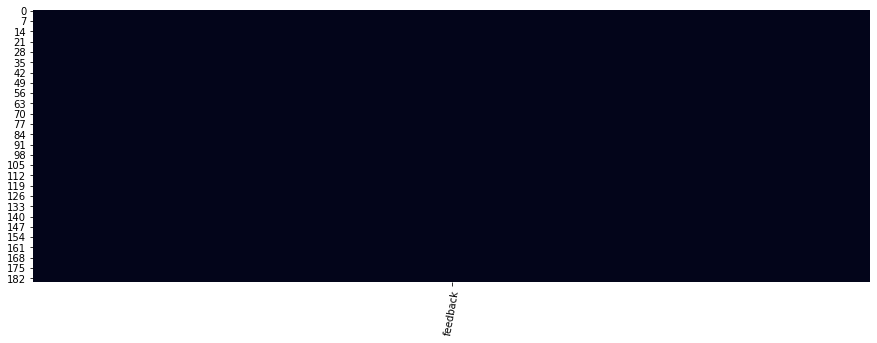

In [9]:
#check data null ft heatmap
plt.figure(figsize=(15,5))
sns.heatmap(data.isnull(), cbar=False)
plt.xticks(rotation='80')
plt.show()

In [10]:
#check duplicates values number
def check_duplicate_values(data):
    print("**"*54)
    print("Duplicated values, there are: ", data.duplicated().sum())
    print("**"*54)
    
#check duplicates values
#call above function

check_duplicate_values(data)

************************************************************************************************************
Duplicated values, there are:  58
************************************************************************************************************


In [11]:
#drop duplicates values in sample data
data.drop_duplicates(keep=False, inplace=True)

In [14]:
#define a variable and copy dataset
df_sent = data['feedback']

In [15]:
#drop null values
df_sent.dropna(inplace=True)

In [16]:
#check the number of missing values
df_sent.isnull().sum()

0

In [17]:
type(df_sent)

pandas.core.series.Series

In [18]:
#convert to dataframe
df_sent = pd.DataFrame(df_sent)

In [19]:
type(df_sent)

pandas.core.frame.DataFrame

In [20]:
# Loading dictionary of smilies
def load_dict_smileys():
 
 return {
 ":-)": "smiley",
 ":)" : "smiley",
 ":D": "smiley",
 "xD": "smiley",
 ":’)" : "smiley",
 ":’D" : "smiley",
 ":3" : "smiley",
 ":]" : "smiley",
 ":^)" : "smiley",
 ":-]" : "smiley",
 ":-3" : "smiley",
 ":->" : "smiley",
 ":))" : "smiley",
 "8-)" : "cool",
 "8)" : "cool",
 "8-D" : "cool",
 "B)" : "cool",
 "BD" : "cool",
 ":-}": "smiley",
 ":>" : "smiley",
 ":}" : "smiley",
 ":o)" : "smiley",
 ":c)" : "smiley",
 "=)" : "smiley",
 "=D" : "smiley",
 "=]" : "smiley",
 ":-D" : "smiley",
 "XD" : "smiley",
 ":o" : "surprised",
 ":O" : "surprised",
 "=o" : "surprised",
 "=O" : "surprised",
 ":0" : "surprised",
 ":(" : "sad",
 ":C" : "sad",
 ":c" : "sad",
 "=(" : "sad",
 "=c" : "sad",
 "=C" : "sad",
 ":-(" : "sad",
 ":-c" : "sad",
 ":-C" : "sad",
 ":-<" : "sad",
 ":<" : "sad",
 ":[" : "sad",
 ":{" : "sad",
 ":’(" : "crying",
 ":P" : "playful",
 ":p" : "playful",
 "xP" : "playful",
 "XP": "playful",
 "=P": "playful",
 "=p" : "playful",
 "xp": "playful",
 "xb": "playful",
 "❤": "love",
 "</3": "sad",
 ":/": "worried",
 ":-/" : "worried"
}

In [21]:
#create a function to convert text into lowercase
def convert_to_lowercase(text):
    text = text.str.lower()
    return text

cachedStopWords = stopwords.words("english")
def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in cachedStopWords])
    return text


#create a function to apply word tokenization
def convert_to_word_tokens(text):
    text = text.word_tokenize(text)
    return text

#create a function to apply word tokenization
def convert_to_sentence_tokens(text):
    text = text.sent_tokenize(text)
    return text

#create a function to apply word tokenization
def convert_to_pos_tagging(text):
    text = text.pos_tag(text)
    return text

#calculate word length
def text_length_calculation(text):
    return len(text.split(' '))
    
#remove space
def remove_space(series):
    series.replace(" ", "", inplace=True)
    
            
#function to clean the word of any html-tags
def remove_html(sentence): 
    clean = re.compile('<.*?>')
    clean_text = re.sub(clean, ' ', sentence)
    return clean_text

#remove url from text
def remove_urls(text):
    url_pattern = re.compile(r'href|http.\w+')
    return url_pattern.sub(r'', text)

def remove_abbreviations(text):
    tokens = text.split(" ")
    j = 0
    for token in tokens:
        file_name = "<path to CSV file>"
        with open(file_name, "r") as fh:
            reader = csv.reader(fh)
            for row in reader:
                if row[0] == token:
                    tokens[j] = row[1]
                    fh.close()
                    j = j + 1
    return "".join(tokens)

# Removing smilies and emojis
def remove_emoticons(text):
    smilies = load_dict_smileys()
    split_tweet = text.split(" ")
    for key,val in smilies.items():
        if key in text:
            new_tweet = text.replace(key, val)
            text = new_tweet
            text = emoji.demojize(text)
            text = ' '.join(text.split())
    return text

def preprocess(text, stem=False):
    # Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [22]:
#create a function to remove punctuation
def remove_punctuation(text):
    text = re.sub('\[.*?\]', '', str(text))
    text = re.sub('[%s]' % re.escape(string.punctuation),'', str(text))
    text = re.sub('\w*\d\w*', '', str(text))
    text = re.sub('[‘’“”…]', '', str(text))
    text = re.sub('\n', '', str(text))
    return text
remove_pun = lambda x: remove_punctuation(x)

In [23]:
#remove white space from series of the dataset
remove_space(df_sent.feedback)

In [24]:
#convert to lowercase
df_sent['feedback'] = convert_to_lowercase(df_sent.feedback)

In [25]:
#remove Punctuation

#********************************************************************************************************
#it spends much time to run
#********************************************************************************************************
df_sent['feedback'] = df_sent['feedback'].apply(lambda x: remove_punctuation(x))

In [26]:
#remove stopword
#It takes much time to run.
df_sent.feedback = df_sent.feedback.apply(remove_stopwords)

In [27]:
#remove smilies

#********************************************************************************************************
#it spends much time 
#********************************************************************************************************
df_sent['feedback'] = df_sent['feedback'].apply(lambda x: remove_emoticons(x))

In [28]:
#calculate review and summanry lengthd
df_sent['feedback_length']= df_sent['feedback'].apply(text_length_calculation)

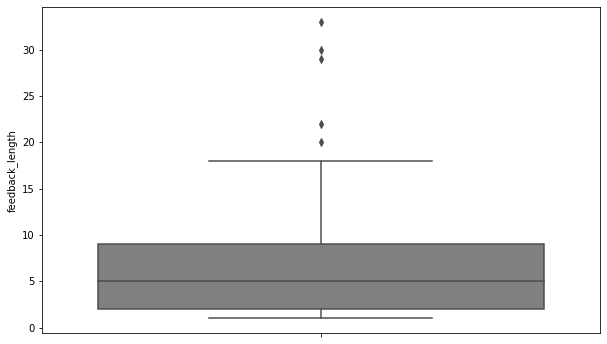

In [29]:
#check outlier of the text length
f, axes = plt.subplots(ncols=1, figsize=(10, 6))

sns.boxplot(y=df_sent['feedback_length'] ,color='grey')
plt.show()


In [30]:
df_sent.shape

(117, 2)

In [31]:
df_sent.head()

,feedback,feedback_length
0,teacher punctual also give us practical knowle...,8
2,excellent lectures delivered teachers teachers...,6
4,teachers give us information required improve ...,7
5,yes,1
6,good punctual,2


In [32]:
#we use textblob python library to calculate the palority values of text

#call sentitment_polarity
polarity=[]
for i in df_sent['feedback']:
    try:
        polarity.append(TextBlob(i).sentiment.polarity)
    except:
        polarity.append(0)

In [33]:
#insert the polarity values as a column
df_sent['polarity'] = polarity 

In [34]:
#check the sentment values
#if the polarity > 0 : Positive
#else the polarity < = : Negative
positive_sent = df_sent[df_sent['polarity'] >= 0]
negative_sent = df_sent[df_sent['polarity'] < 0]

In [35]:
#define the label of sentiment
df_sent['sentiment'] = df_sent['polarity'].apply(lambda x : 1 if x < 0 else 0)

In [36]:
#check the values of sentiment
print("*" * 50)
print("Positive Sentiment: ", positive_sent.shape)
print("Negative Sentiment: ", negative_sent.shape)
print("*" * 50)

**************************************************
Positive Sentiment:  (110, 3)
Negative Sentiment:  (7, 3)
**************************************************


In [37]:
df_sent.head(10)

,feedback,feedback_length,polarity,sentiment
0,teacher punctual also give us practical knowle...,8,0.00,0
2,excellent lectures delivered teachers teachers...,6,1.00,0
4,teachers give us information required improve ...,7,0.00,0
5,yes,1,0.00,0
6,good punctual,2,0.70,0
7,good,1,0.70,0
10,good compare btech lectures teaching activities,6,0.70,0
12,way teaching good,3,0.70,0
13,university teaching much dependent upon slides...,22,0.35,0
16,compared colleges university university perfec...,6,1.00,0


In [38]:
#drop the polarity feature
df_sent.drop(['polarity', 'feedback_length'], axis=1, inplace=True)

In [39]:
df_sent.head()

,feedback,sentiment
0,teacher punctual also give us practical knowle...,0
2,excellent lectures delivered teachers teachers...,0
4,teachers give us information required improve ...,0
5,yes,0
6,good punctual,0


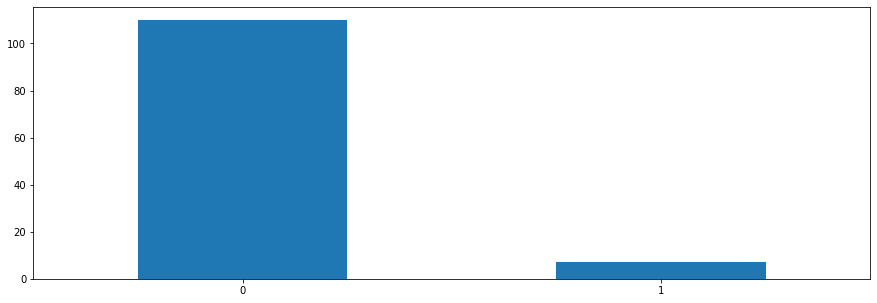

In [49]:
plt.figure(figsize=(15,5))
df_sent.sentiment.value_counts().plot(kind='bar')
plt.xticks(rotation='0')
plt.show()

In [50]:
df_sent.tail()

,feedback,sentiment
180,intraction good leacture delivery also good pu...,0
181,given terms good regarding university,0
182,terms good regarding university activities,0
183,teacher un eplayfulerienced also unfair baised...,1
184,going good,0


In [51]:
#export cleaned dataset
df_sent.to_csv('dataset/secondary_cleaned_data_1.csv')